| Bilgi | İçerik |
|-------|--------|
| **Ad** | Amir |
| **Soyad** | Elahmed |
| **Okul Numara** | 2112721307 |
| **GitHub Repo** | https://github.com/Amirelahmed/CNN_siniflandirma |



Bu modelde, tarafımdan çekilmiş Taş ve Mermer sınıflarından oluşan veri seti kullanılarak sıfırdan oluşturulmuş temel bir CNN mimarisi eğitilmiştir.
Amaç, transfer learning kullanmadan yalnızca temel evrişimli katmanlarla sınıflandırma performansını değerlendirmektir.

Model, üç adet Conv2D + MaxPooling, ardından Flatten, Dense(128) ve Dropout(0.5) katmanları ile oluşturulmuş ve iki sınıflı softmax çıkışı üretilmiştir.

Eğitim Sonuçları (Gerçek Çıktılara Göre)

Eğitim Doğruluğu (En Yüksek): %100

Doğrulama Doğruluğu (En İyi): %96.67

Test Doğruluğu: %96.67

Test Kaybı: 0.116

Değerlendirme
Model, eğitim sürecinde hızlı şekilde yüksek doğruluğa ulaşmış ve doğrulama/test aşamalarında da güçlü performans göstermiştir.
Kayıp değerlerinin düzenli düşmesi ve doğrulama doğruluğunun yüksek olması, temel CNN mimarisinin Taş–Mermer ayrımını başarılı şekilde öğrendiğini göstermektedir.

Google Drive'ı bağlıyoruz

In [1]:
# Google Drive'ı Colab ortamına bağlıyoruz
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ZIP dosyasının Drive içindeki yolunu belirliyoruz

In [2]:
# Dataset ZIP yolu
zip_path = "/content/drive/MyDrive/CNN_Tas_Mermer_Dataset/dataset.zip"

# ZIP'in açılacağı klasör
extract_path = "/content/dataset2"

ZIP dosyasını açıyoruz

In [3]:
# Gerekli modülleri içe aktarıyoruz
import os, zipfile

# Klasörü oluştur
os.makedirs(extract_path, exist_ok=True)

# ZIP dosyasını aç
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Ana klasör içeriği:", os.listdir(extract_path))


Ana klasör içeriği: ['dataset']


Dataset'in gerçek yolunu ayarlıyoruz

In [4]:
# ZIP içinde bir klasör daha olduğundan gerçek dataset yolu şöyle:
base_dir = "/content/dataset2/dataset"

# İçeriği kontrol ediyoruz
print("Sınıf klasörleri:", os.listdir(base_dir))

Sınıf klasörleri: ['Tas', 'Mermer']


2 — DATASET HAZIRLIĞI (ImageDataGenerator)

Resim boyutunu ve batch size değerini ayarlıyoruz

In [5]:
# Resimlerin yeniden boyutlandırılacağı boyutlar
img_height = 128
img_width = 128

# Bir batch'te kaç resim işlenecek
batch_size = 32


ImageDataGenerator ile train/validation ayırıyoruz

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resimleri normalize ediyoruz (0–1 aralığı)
# %20 doğrulama seti ayırıyoruz
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


Eğitim verisini yüklüyoruz

In [7]:
train_generator = train_datagen.flow_from_directory(
    base_dir,                        # Dataset klasörü
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",        # 2 sınıf olduğu için categorical
    subset="training",               # %80 eğitim verisi
    shuffle=True
)


Found 120 images belonging to 2 classes.


Doğrulama (validation) verisini yüklüyoruz

In [8]:
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",             # %20 doğrulama verisi
    shuffle=False
)


Found 30 images belonging to 2 classes.


Sınıf isimlerini kontrol ediyoruz

In [9]:
print("Sınıf İndeksleri:", train_generator.class_indices)


Sınıf İndeksleri: {'Mermer': 0, 'Tas': 1}


3 — CNN MODELİNİ OLUŞTURUYORUZ

CNN modelini sıfırdan oluşturuyoruz

In [10]:
from tensorflow.keras import layers, models, optimizers

model2 = models.Sequential([
    # 1. Conv + Pooling
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2,2)),

    # 2. Conv + Pooling
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    # 3. Conv + Pooling
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    # Flatten
    layers.Flatten(),

    # Dense
    layers.Dense(128, activation="relu"),

    # Overfitting azaltma
    layers.Dropout(0.5),

    # Çıkış
    layers.Dense(2, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Modeli derliyoruz (compile)

In [11]:
model2.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Modelin yapısını ekrana yazdırıyoruz
model2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

4 — MODELİ EĞİTİYORUZ

Modeli eğitiyoruz

In [12]:
epochs = 15

history2 = model2.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4559 - loss: 0.9458 - val_accuracy: 0.5000 - val_loss: 0.6690
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6909 - loss: 0.6386 - val_accuracy: 0.8000 - val_loss: 0.6262
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9039 - loss: 0.5090 - val_accuracy: 0.9333 - val_loss: 0.4825
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9327 - loss: 0.3090 - val_accuracy: 0.9000 - val_loss: 0.2992
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9712 - loss: 0.1320 - val_accuracy: 0.8000 - val_loss: 0.3312
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9421 - loss: 0.1366 - val_accuracy: 0.9667 - val_loss: 0.1498
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9550 - loss: 0.0875 - val_accuracy: 0.9000 - val_loss: 0.4432
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9651 - loss: 0.0863 - val_accuracy: 0.8000 - val_loss: 0.3497
Epoch 9/15
4/4

5 — EĞİTİM SONUÇLARINI GÖRSELLEŞTİRİYORUZ

Accuracy grafiğini çiziyoruz

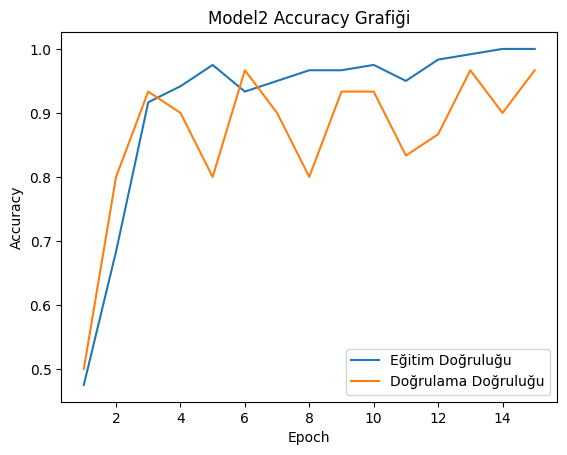

In [13]:
import matplotlib.pyplot as plt

acc = history2.history["accuracy"]
val_acc = history2.history["val_accuracy"]
epochs_range = range(1, len(acc)+1)

plt.plot(epochs_range, acc, label="Eğitim Doğruluğu")
plt.plot(epochs_range, val_acc, label="Doğrulama Doğruluğu")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model2 Accuracy Grafiği")
plt.legend()
plt.show()


Loss grafiğini çiziyoruz

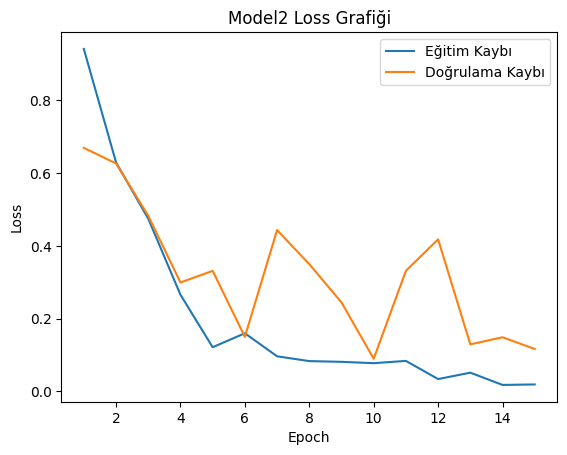

In [14]:
loss = history2.history["loss"]
val_loss = history2.history["val_loss"]

plt.plot(epochs_range, loss, label="Eğitim Kaybı")
plt.plot(epochs_range, val_loss, label="Doğrulama Kaybı")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model2 Loss Grafiği")
plt.legend()
plt.show()


6 — TEST (VALIDATION) DOĞRULUĞUNU HESAPLIYORUZ

Validation seti üzerinde test ölçümü yapıyoruz

In [15]:
test_loss, test_acc = model2.evaluate(val_generator)
print("Model2 Test Doğruluğu:", test_acc)
print("Model2 Test Kaybı:", test_loss)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9667 - loss: 0.1167
Model2 Test Doğruluğu: 0.9666666388511658
Model2 Test Kaybı: 0.11667294055223465
